# Stroke Prediction

Table of Contents:
1. [Importing Libraries](#1) <a href= "1"></a>
2. [Importing Dataset](#2) <a href= "2"></a>
3. [Data Visualization](#3) <a href= "3"></a> <br> 
    3.1. [Heat Map Correlation](#3.1) <a href= "3.1"></a> <br>
    3.2. [Count Plot](#3.2) <a href= "3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Gender](#3.2.1) <a href= "3.2.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Hypertension](#3.2.2) <a href= "3.2.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [Marriage Status](#3.2.3) <a href= "3.2.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [Work Type](#3.2.4) <a href= "3.2.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [Residence Type](#3.2.5) <a href= "3.2.5"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; f. [Smoking Status](#3.2.6) <a href= "3.2,6"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; g. [Stroke](#3.2.7) <a href= "3.2.7"></a> <br>
    3.3 [Distribution Plot](#3.3) <a href= "3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Avg. Glucose Level](#3.3.1) <a href= "3.3.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [BMI](#3.3.2) <a href= "3.3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [No Stroke vs Stroke by BMI](#3.3.3) <a href= "3.3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [No Stroke vs Stroke by Avg. Glucose Level](#3.3.4) <a href= "3.3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [No Stroke vs Stroke by Age](#3.3.5) <a href= "3.3.5"></a> <br>
    3.4 [Scatter Plot](#3.4) <a href= "3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Age vs BMI](#3.4.1) <a href= "3.4.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Age vs Avg. Glucose Level](#3.4.2) <a href= "3.4.2"></a> <br>
    3.5 [Cat Plot](#3.5) <a href= "3.5"></a> <br>
    3.6 [Pair Plot](#3.6) <a href= "3.6"></a> <br>
4. [Data Preprocessing](#4) <a href= "4"></a> <br>

9. [Model Selection](#9) <a href= "9"></a> <br>
10. [Tuning the Models](#10) <a href= "10"></a> <br>
11. [Models after Tuning Hyperparameters](#11) <a href= "11"></a> <br>
    11.1 [RandomForest](#11.1) <a href= "11.1"></a> <br>
    11.2 [XGBoost](#11.2) <a href= "11.2"></a> <br>

# **Importing Libraries** <a id="1"></a>

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [180]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [181]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,62861,Female,78.0,0,0,Yes,Private,Urban,67.29,24.6,never smoked,1
1,71061,Male,59.0,0,0,Yes,Govt_job,Urban,70.04,31.4,never smoked,0
2,50363,Female,73.0,1,0,Yes,Private,Rural,60.98,29.9,formerly smoked,0
3,21110,Female,43.0,0,0,Yes,Private,Urban,93.30,32.7,never smoked,0
4,7529,Male,67.0,0,0,Yes,Private,Rural,83.16,25.5,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6472,1681,Female,68.0,0,0,No,Private,Urban,82.85,NaN,smokes,0
6473,45485,Female,45.0,0,0,Yes,Self-employed,Urban,92.76,22.3,Unknown,0
6474,65564,Female,48.0,0,0,Yes,Private,Urban,57.43,53.5,formerly smoked,0
6475,22155,Female,39.0,0,0,Yes,Private,Urban,78.24,28.6,Unknown,0


In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6477 non-null   int64  
 1   gender             6477 non-null   object 
 2   age                6477 non-null   float64
 3   hypertension       6477 non-null   int64  
 4   heart_disease      6477 non-null   int64  
 5   ever_married       6477 non-null   object 
 6   work_type          6477 non-null   object 
 7   Residence_type     6477 non-null   object 
 8   avg_glucose_level  6477 non-null   float64
 9   bmi                6250 non-null   float64
 10  smoking_status     6477 non-null   object 
 11  stroke             6477 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 607.3+ KB


**There are null values present in 'bmi'.**

In [183]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  227
smoking_status         0
stroke                 0
dtype: int64

In [184]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [185]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [186]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000
mean,36445.442952,48.421111,0.087541,0.054655,110.395878,29.137306,0.249498
std,21025.018217,22.811993,0.282647,0.227323,46.766175,7.173731,0.432756
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17492.000000,31.000000,0.000000,0.000000,78.952671,24.600000,0.000000
50%,37029.000000,52.000000,0.000000,0.000000,94.630000,28.700000,0.000000
75%,54371.000000,67.573548,0.000000,0.000000,123.000000,32.700000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [187]:
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
subset_dataset = dataset[selected_columns]

# Tính toán ma trận tương quan
correlation_matrix = subset_dataset.corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.205861,0.204970,0.245104,0.285235,0.490392
hypertension,0.205861,1.000000,0.108173,0.123111,0.131651,-0.008162
heart_disease,0.204970,0.108173,1.000000,0.204650,0.059526,0.057572
avg_glucose_level,0.245104,0.123111,0.204650,1.000000,0.225397,0.207711
bmi,0.285235,0.131651,0.059526,0.225397,1.000000,0.073463
stroke,0.490392,-0.008162,0.057572,0.207711,0.073463,1.000000


# **Data Visualization** <a id="3"></a>

## **Heat Map Correlation** <a id="3.1"></a>

In [188]:
# # Bỏ cột 'id'
# subset_dataset = subset_dataset.drop(columns=['id'])

# # Tính ma trận tương quan
# corr = subset_dataset.corr()

# # Thiết lập figure cho matplotlib
# plt.figure(figsize=(10, 8))

# # Vẽ biểu đồ heatmap với cmap
# sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# # Hiển thị biểu đồ
# plt.show()

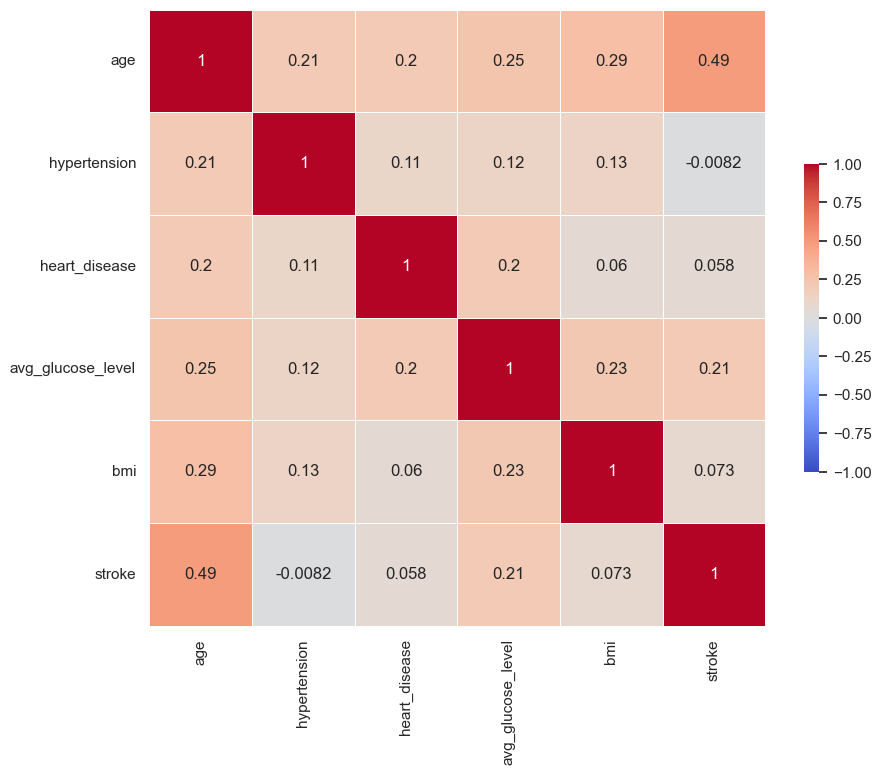

In [189]:
# Bỏ cột 'id'
#subset_dataset = subset_dataset.drop(columns=['id'])

# Tính ma trận tương quan
corr = subset_dataset.corr()

# Thiết lập figure cho matplotlib
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ heatmap với cmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hiển thị biểu đồ
plt.show()

## **Count Plot** <a id="3.2"></a>

### **Gender** <a id="3.2.1"></a>

gender
Female    4069
Male      2408
Name: count, dtype: int64


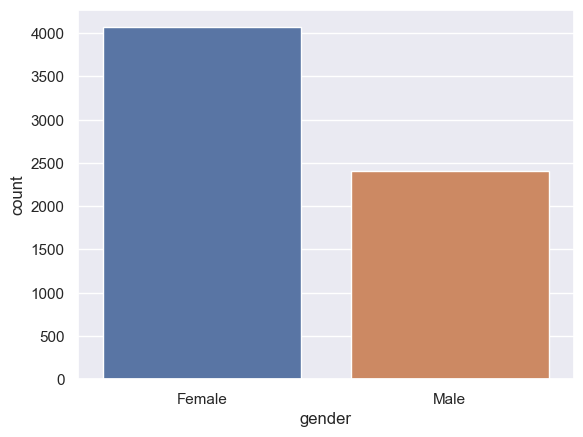

In [190]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

*Above, you can see the Females present in our dataset is higher than males.*

### **Hypertension** <a id="3.2.2"></a>

hypertension
0    5910
1     567
Name: count, dtype: int64


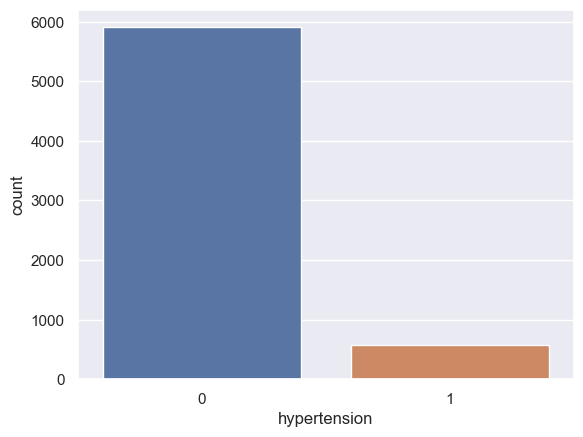

In [191]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

*From above, it shows that less people are suffering from hypertension.*

### **Marriage Status** <a id="3.2.3"></a>

ever_married
Yes    4361
No     2116
Name: count, dtype: int64


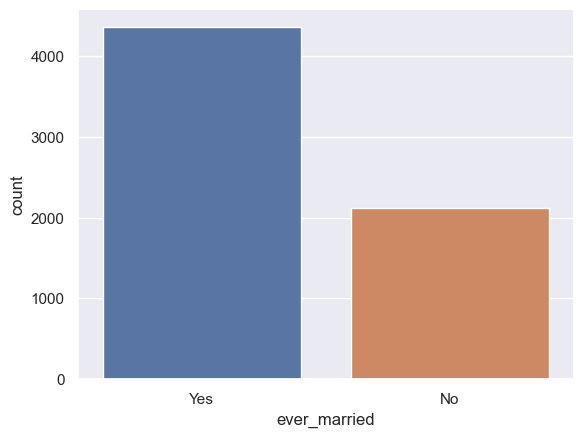

In [192]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

*The ratio can seen from above is around 2:1 for being ever married.*

### **Work Type** <a id="3.2.4"></a>

work_type
Private          3820
Self-employed    1017
Govt_job          824
children          687
Never_worked      129
Name: count, dtype: int64


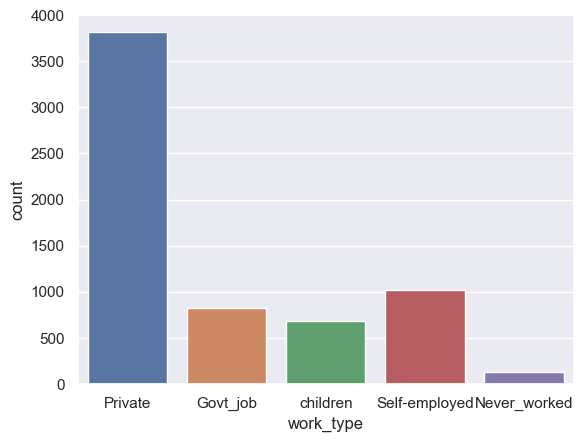

In [193]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

*A lot of people works in Private sector.*

### **Residence Type** <a id="3.2.5"></a>

Residence_type
Rural    3288
Urban    3189
Name: count, dtype: int64


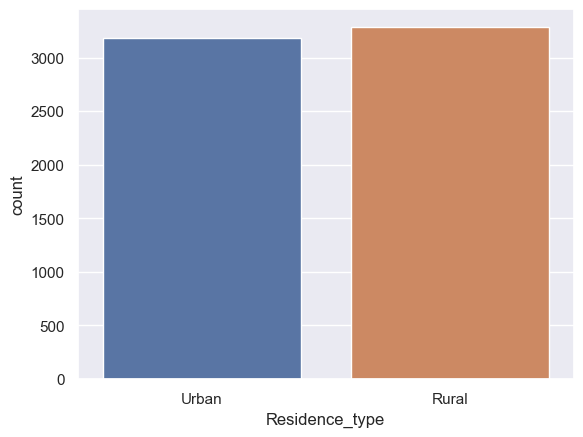

In [194]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

*The residence type is same for people present in our dataset.*

### **Smoking Status** <a id="3.2.6"></a>

smoking_status
never smoked       2217
Unknown            1920
formerly smoked    1527
smokes              813
Name: count, dtype: int64


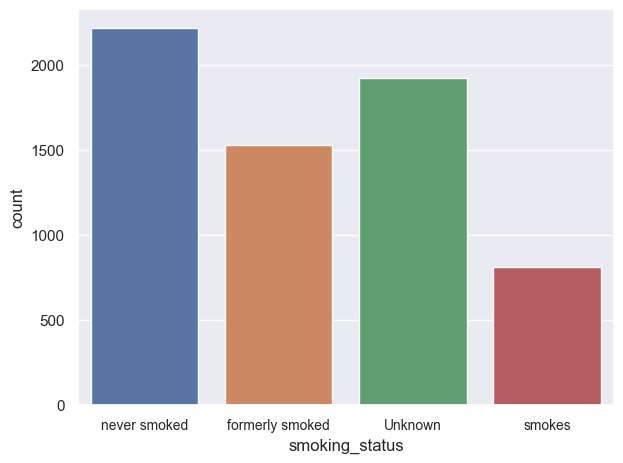

In [195]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

*A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.*

### **Stroke** <a id="3.2.7"></a>

stroke
0    4861
1    1616
Name: count, dtype: int64


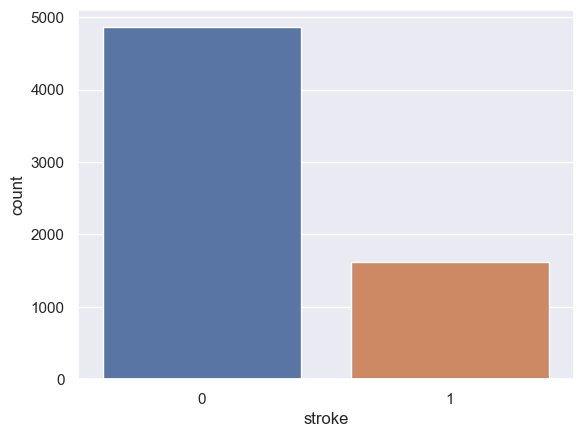

In [196]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

*From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.*

*But, first let's plot more to see how our data does in this state.*

## **Distribution Plot** <a id="3.3"></a>

### **Avg. Glucose Level** <a id="3.3.1"></a>

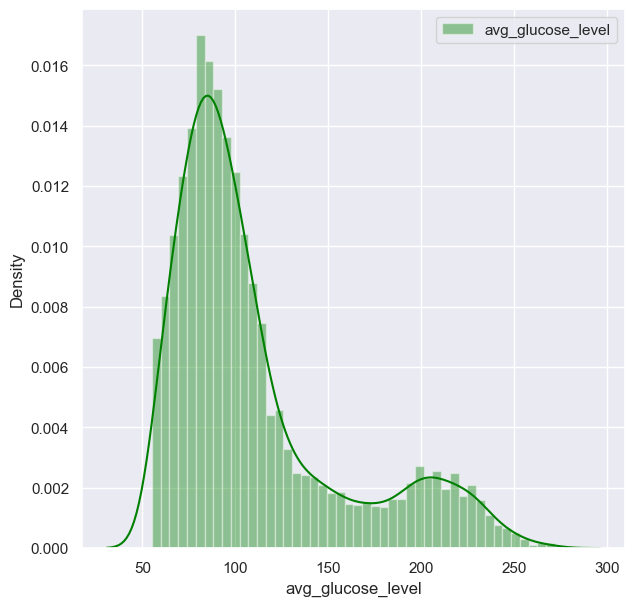

In [197]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

*1. The normal glucose levels in adults should be around 80-140. Therefore, the density is higher around that range. So, we can see that the we have lot of people who have normal glucose level, so they are not suffering from diabetes.*

*2. The range 140-200 can considered as pre-diabetes. But, looking at graph we can see that less people are in pre-diabetes zone.*

*3. Anything above 200 can be seen that the person is suffering from diabetes. The density is more as compare to pre-diabetes by looking at the graph.*

### **BMI** <a id="3.3.2"></a>

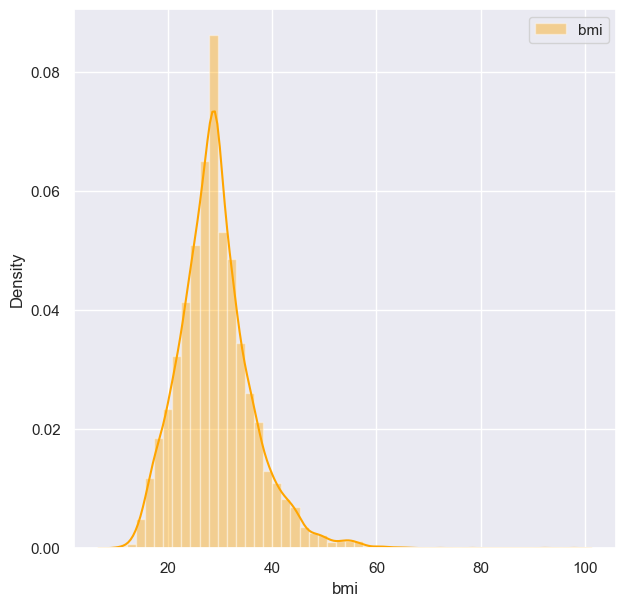

In [198]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

*1. BMI below 19 can be seen as under weight. By looking at our graph, not lot of people are underweight.*

*2. BMI between 19-25 can be seen as normal weight. We have relatively good amount of people who have normal weight.*

*3. BMI higher than 25 can be seen as the person is likely overweight or obese. Our graph shows the density is higher around those BMI.*

### **No Stroke vs Stroke by BMI** <a id="3.3.3"></a>

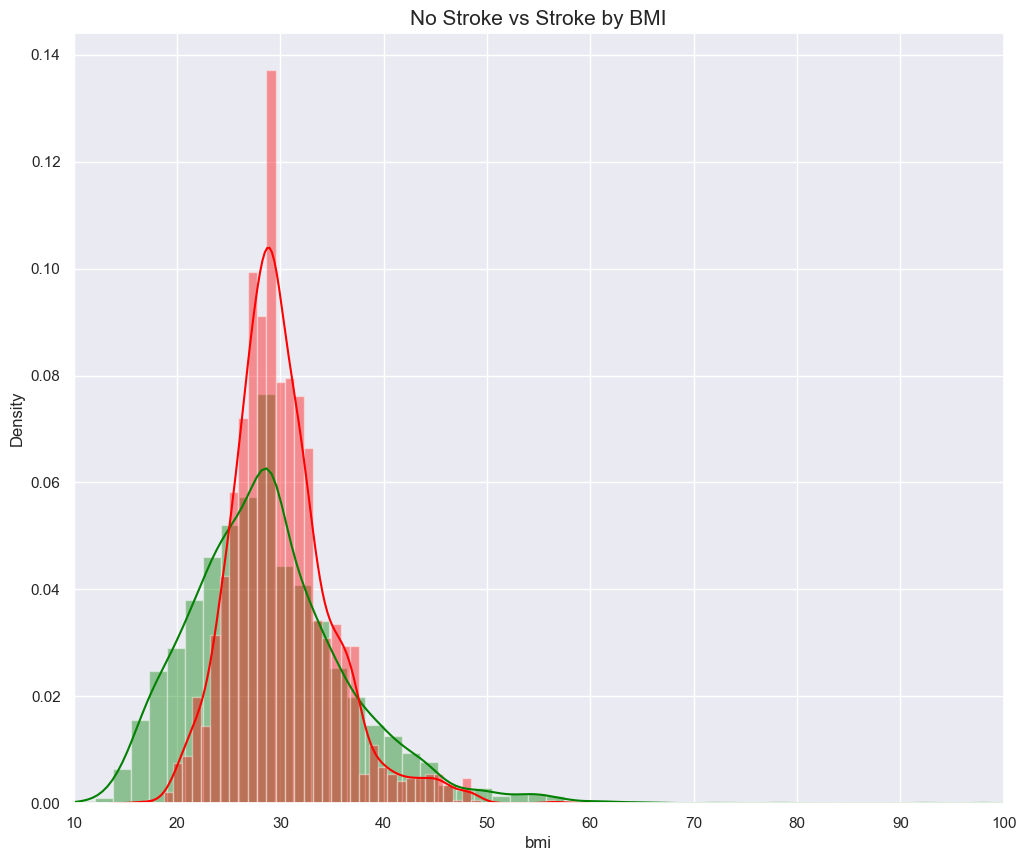

In [199]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

*From the graph, it shows that the density of overweight people who suffered a stroke is more.*

### **No Stroke vs Stroke by Avg. Glucose Level** <a id="3.3.4"></a>

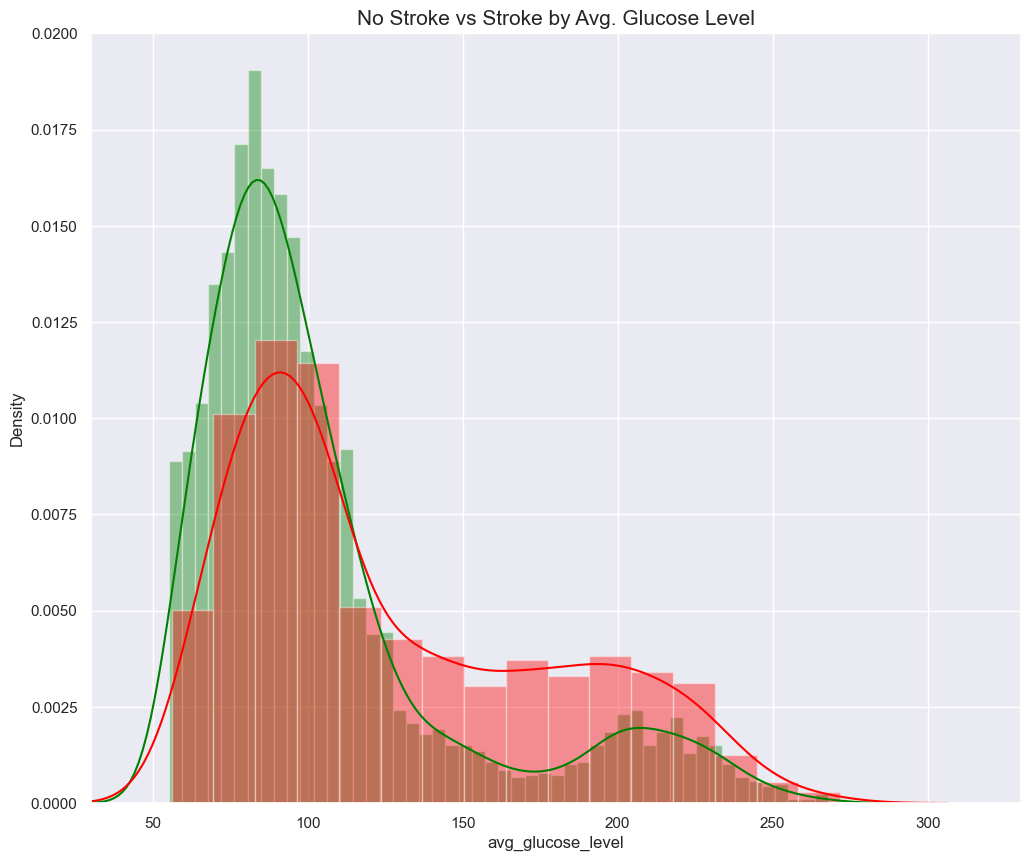

In [200]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

*From graph, it shows that the density of people having glucose level less than 100 suffered stroke more.*

### **No Stroke vs Stroke by Age** <a id="3.3.5"></a>

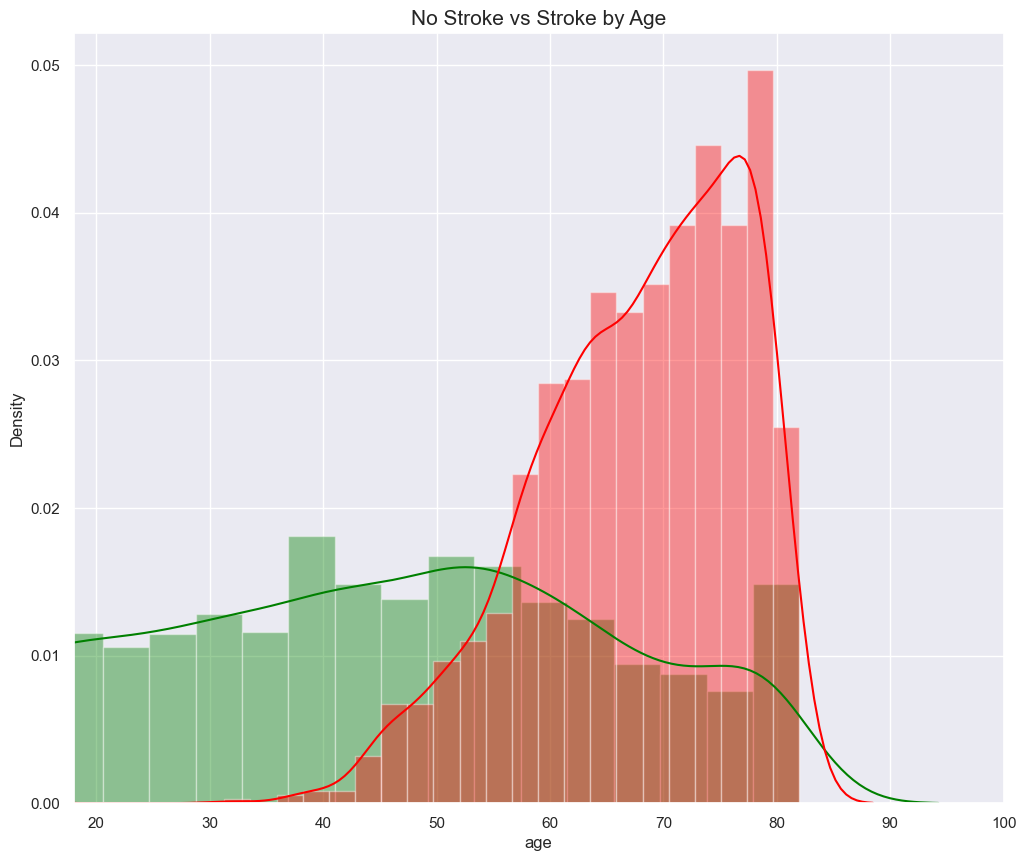

In [201]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

*From graph, it can be seen that the density of people having age above 50 suffered stroke more.*

## **Scatter Plot** <a id="3.4"></a>

### **Age vs BMI** <a id="3.4.1"></a>

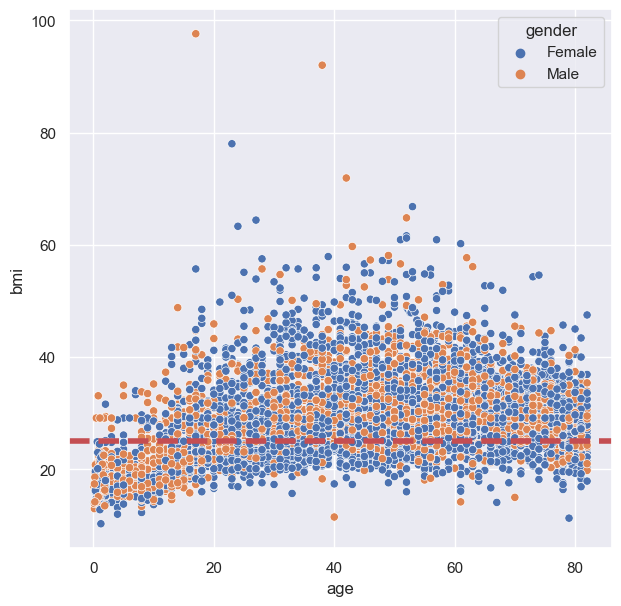

In [202]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.*

### **Age vs Avg. Glucose Level** <a id="3.4.2"></a>

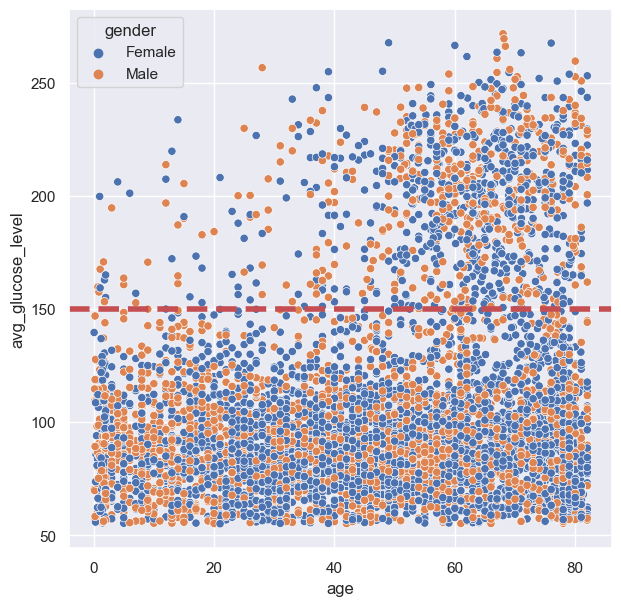

In [203]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.*

## **Violin Plot** <a id="3.5"></a>

In [204]:
# plt.figure(figsize=(13,13))
# sns.set_theme(style="darkgrid")
# plt.subplot(2,3,1)
# sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
# plt.subplot(2,3,2)
# sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
# plt.subplot(2,3,3)
# sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
# plt.subplot(2,3,4)
# sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
# plt.subplot(2,3,5)
# sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
# plt.xticks(fontsize=9, rotation=45)
# plt.subplot(2,3,6)
# sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
# plt.show()

## **Pair Plot** <a id="3.6"></a>

<Figure size 1000x1000 with 0 Axes>

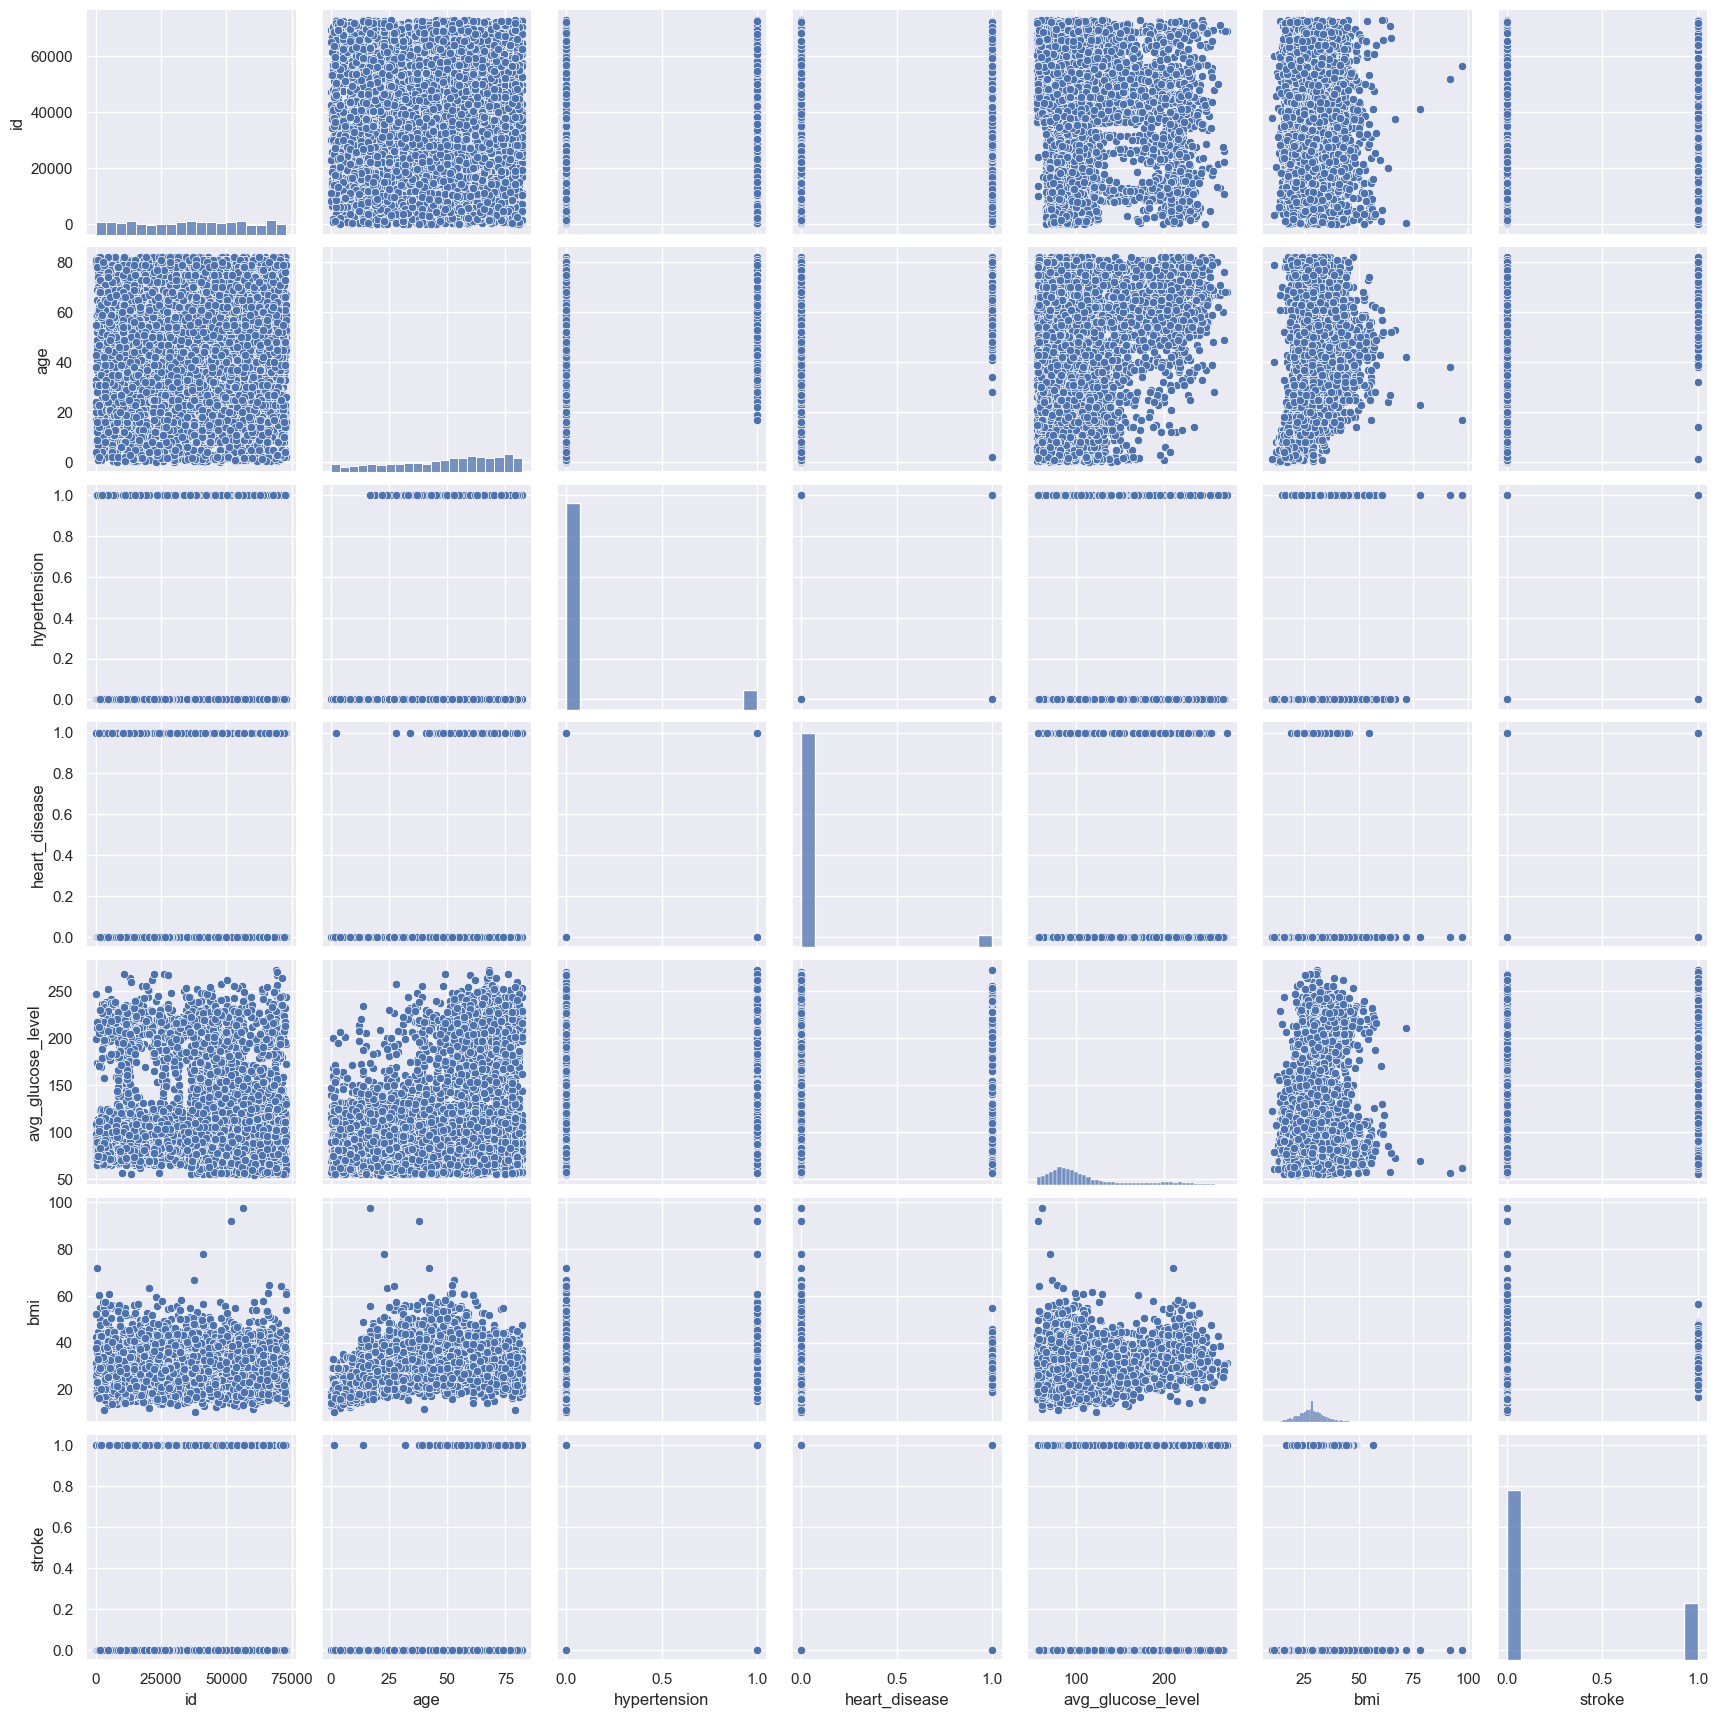

In [205]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# **Data Preprocessing** <a id="4"></a>

**Encoding**

In [206]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,62861,Female,78.0,0,0,Yes,Private,Urban,67.29,24.600000,never smoked,1
1,71061,Male,59.0,0,0,Yes,Govt_job,Urban,70.04,31.400000,never smoked,0
2,50363,Female,73.0,1,0,Yes,Private,Rural,60.98,29.900000,formerly smoked,0
3,21110,Female,43.0,0,0,Yes,Private,Urban,93.30,32.700000,never smoked,0
4,7529,Male,67.0,0,0,Yes,Private,Rural,83.16,25.500000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6472,1681,Female,68.0,0,0,No,Private,Urban,82.85,29.137306,smokes,0
6473,45485,Female,45.0,0,0,Yes,Self-employed,Urban,92.76,22.300000,Unknown,0
6474,65564,Female,48.0,0,0,Yes,Private,Urban,57.43,53.500000,formerly smoked,0
6475,22155,Female,39.0,0,0,Yes,Private,Urban,78.24,28.600000,Unknown,0


In [207]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # CASE 0: Binary encoder
# dataset['gender']=dataset['gender'].apply(lambda x : 1 if x=='Male' else 0) 
# dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
# dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# # CASE 1: Use OneHotEncoder() to encode the categorical columns:
# # data_dummies = dataset[['smoking_status','work_type']]
# # data_dummies=pd.get_dummies(data_dummies)
# # dataset.drop(columns=['smoking_status','work_type'],inplace=True)
# # CASE 2: Use LabelEncoder() to encode the categorical columns:
# label_encoder = LabelEncoder()
# dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status'])
# dataset['work_type'] = label_encoder.fit_transform(dataset['work_type'])

In [208]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# dataset['gender'] = dataset['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)
dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

# Mã hóa one-hot cho các cột 'smoking_status' và 'work_type'
dataset = pd.get_dummies(dataset, columns=['smoking_status', 'work_type','gender','Residence_type'])

# Lưu lại danh sách các tên trường sau khi mã hóa
feature_names = dataset.columns.tolist()


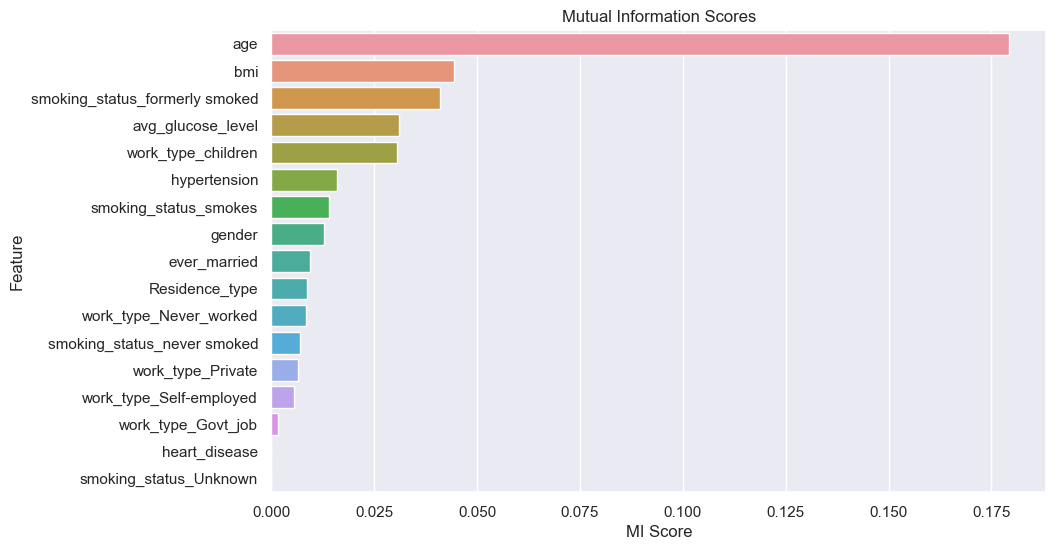

In [209]:
from sklearn.feature_selection import mutual_info_classif
# Tính toán điểm Mutual Information
mi_scores = mutual_info_classif(x, y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Vẽ biểu đồ Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.show()

**Train, validation, test set**

In [210]:
y=dataset['stroke']
dataset.drop(columns=['id','stroke'],inplace=True)
x=dataset.astype(int)

from sklearn.model_selection import train_test_split
x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, train_size= 0.7, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size= 0.5, random_state = 1)

**Handle imblanced data**

In [211]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

#adasyn = ADASYN()
#x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train.ravel())

#borderline_smote = BorderlineSMOTE()
#x_train_res, y_train_res = borderline_smote.fit_resample(x_train, y_train.ravel())

**Add noise**

In [212]:
def add_noise(data, noise_level=0.02):
    noisy_data = data.copy()
    for column in ['bmi', 'age', 'glucose']:
        if column in noisy_data.columns:
            noise = np.random.normal(0, noise_level, size=noisy_data[column].shape)
            noisy_data[column] += noise
    return noisy_data

In [213]:
x_train_res = add_noise(x_train_res)

**Normailzation**

In [214]:
x_test_debug=x_test
x_val_debug=x_val

In [215]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

# Model Selection <a id="9"></a>

In [216]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [218]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [219]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_val)
    roc = roc_auc_score(y_val, y_pred)          #ROC AUC Score
    precision = precision_score(y_val, y_pred)  #Precision Score
    recall = recall_score(y_val, y_pred)        #Recall Score
    f1 = f1_score(y_val, y_pred)                #F1 Score
    print(models[m][0],':')
    print('Accuracy Score: ',accuracy_score(y_val, y_pred))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_val, y_pred))*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
Accuracy Score:  0.8415637860082305

ROC AUC Score: 0.82

Precision: 0.65

Recall: 0.77

F1: 0.70
-----------------------------------

SVM :
Accuracy Score:  0.8724279835390947

ROC AUC Score: 0.85

Precision: 0.71

Recall: 0.80

F1: 0.75
-----------------------------------

KNeighbors :
Accuracy Score:  0.8713991769547325

ROC AUC Score: 0.85

Precision: 0.71

Recall: 0.80

F1: 0.75
-----------------------------------

GaussianNB :
Accuracy Score:  0.7150205761316872

ROC AUC Score: 0.77

Precision: 0.45

Recall: 0.89

F1: 0.60
-----------------------------------

BernoulliNB :
Accuracy Score:  0.7911522633744856

ROC AUC Score: 0.81

Precision: 0.54

Recall: 0.84

F1: 0.66
-----------------------------------

Decision Tree :
Accuracy Score:  0.8631687242798354

ROC AUC Score: 0.83

Precision: 0.70

Recall: 0.75

F1: 0.73
-----------------------------------

Random Forest :
Accuracy Score:  0.8940329218106996

ROC AUC Score: 0.86

Precision: 0.78

Recall: 0.79

F

In [220]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [221]:
df.iloc[0]

Model        Logistic Regreesion
Accuracy               84.156379
ROC AUC                 0.815815
Precision               0.645161
Recall                  0.765957
F1                      0.700389
Name: 0, dtype: object

In [222]:
df.iloc[1]

Model              SVM
Accuracy     87.242798
ROC AUC       0.846312
Precision     0.711027
Recall        0.795745
F1            0.751004
Name: 1, dtype: object

In [223]:
df.iloc[2]

Model        KNeighbors
Accuracy      87.139918
ROC AUC        0.848532
Precision      0.705224
Recall         0.804255
F1             0.751491
Name: 2, dtype: object

In [224]:
df.iloc[3]

Model        GaussianNB
Accuracy      71.502058
ROC AUC        0.772947
Precision      0.454148
Recall         0.885106
F1             0.600289
Name: 3, dtype: object

In [225]:
df.iloc[4]

Model        BernoulliNB
Accuracy       79.115226
ROC AUC         0.808658
Precision       0.543956
Recall          0.842553
F1              0.661102
Name: 4, dtype: object

In [226]:
df.iloc[5]

Model        Decision Tree
Accuracy         86.316872
ROC AUC           0.825714
Precision         0.702381
Recall            0.753191
F1                0.726899
Name: 5, dtype: object

In [227]:
df.iloc[6]

Model        Random Forest
Accuracy         89.403292
ROC AUC            0.85911
Precision            0.775
Recall            0.791489
F1                0.783158
Name: 6, dtype: object

In [228]:
df.iloc[7]

Model          XGBoost
Accuracy     88.374486
ROC AUC       0.847978
Precision         0.75
Recall        0.778723
F1            0.764092
Name: 7, dtype: object

In [229]:
df.sort_values(by= ['Recall'], inplace= True, ascending= False)
df

,Model,Accuracy,ROC AUC,Precision,Recall,F1
3,GaussianNB,71.502058,0.772947,0.454148,0.885106,0.600289
4,BernoulliNB,79.115226,0.808658,0.543956,0.842553,0.661102
2,KNeighbors,87.139918,0.848532,0.705224,0.804255,0.751491
1,SVM,87.242798,0.846312,0.711027,0.795745,0.751004
6,Random Forest,89.403292,0.859110,0.775000,0.791489,0.783158
7,XGBoost,88.374486,0.847978,0.750000,0.778723,0.764092
0,Logistic Regreesion,84.156379,0.815815,0.645161,0.765957,0.700389
5,Decision Tree,86.316872,0.825714,0.702381,0.753191,0.726899


# Tuning the Models <a id="10"></a>

In [230]:
from sklearn.model_selection import GridSearchCV

*The **GridSearchCV** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.*

In [231]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [232]:
grid_models = [
    (LogisticRegression(), 
     [{'C': [0.25, 0.5, 0.75, 1], 'random_state': [0]}]), 
    (KNeighborsClassifier(), 
     [{'n_neighbors': [5, 7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
    (SVC(), 
     [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf'], 'random_state': [0]}]), 
    (GaussianNB(), 
     [{'var_smoothing': [1e-09, 1e-08, 1e-07]}]), 
    (BernoulliNB(), 
     [{'alpha': [0.25, 0.5, 1], 'binarize': [0.0, 0.5, 1.0]}]), 
    (DecisionTreeClassifier(), 
     [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'random_state': [0]}]), 
    (RandomForestClassifier(), 
     [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [0]}]), 
    (XGBClassifier(), 
     [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error'], 'max_depth': [3, 5, 7]}])
]

In [233]:
# for i,j in grid_models:
#     grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'f1',cv = 10)
#     grid.fit(x_train_res, y_train_res)
#     best_accuracy = grid.best_score_
#     best_param = grid.best_params_
#     print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
#     print('Best Parameters : ',best_param)
#     print('')
#     print('----------------')
#     print('')

*Looking at output after **GridSearch**, we can determine that the **RandomForest** and **XGBoost** seems best fit for the model.*

# After grid

In [234]:
# models = []
# models.append(['Logistic Regression', LogisticRegression(C=0.5, random_state=0)])
# models.append(['SVM', SVC(C=1, kernel='rbf', random_state=0)])
# models.append(['KNeighbors', KNeighborsClassifier(metric='manhattan', n_neighbors=5)])
# models.append(['GaussianNB', GaussianNB(var_smoothing=1e-09)])
# models.append(['BernoulliNB', BernoulliNB(alpha=0.25, binarize=0.0)])
# models.append(['Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)])
# models.append(['Random Forest', RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200, random_state=0)])
# models.append(['XGBoost', XGBClassifier(eval_metric='error', learning_rate=0.1, max_depth=7, random_state=0)])

# lst_1= []

# for m in range(len(models)):
#     lst_2= []
#     model = models[m][1]
#     model.fit(x_train_res, y_train_res)
#     y_pred = model.predict(x_val)
#     roc = roc_auc_score(y_val, y_pred)          #ROC AUC Score
#     precision = precision_score(y_val, y_pred)  #Precision Score
#     recall = recall_score(y_val, y_pred)        #Recall Score
#     f1 = f1_score(y_val, y_pred)                #F1 Score
#     print(models[m][0],':')
#     print('Accuracy Score: ',accuracy_score(y_val, y_pred))
#     print('')
#     print('ROC AUC Score: {:.2f}'.format(roc))
#     print('')
#     print('Precision: {:.2f}'.format(precision))
#     print('')
#     print('Recall: {:.2f}'.format(recall))
#     print('')
#     print('F1: {:.2f}'.format(f1))
#     print('-----------------------------------')
#     print('')
#     lst_2.append(models[m][0])
#     lst_2.append((accuracy_score(y_val, y_pred))*100)
#     lst_2.append(roc)
#     lst_2.append(precision)
#     lst_2.append(recall)
#     lst_2.append(f1)
#     lst_1.append(lst_2)

In [235]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [236]:
df.iloc[0]

Model        Logistic Regreesion
Accuracy               84.156379
ROC AUC                 0.815815
Precision               0.645161
Recall                  0.765957
F1                      0.700389
Name: 0, dtype: object

In [237]:
df.iloc[1]

Model              SVM
Accuracy     87.242798
ROC AUC       0.846312
Precision     0.711027
Recall        0.795745
F1            0.751004
Name: 1, dtype: object

In [238]:
df.iloc[2]

Model        KNeighbors
Accuracy      87.139918
ROC AUC        0.848532
Precision      0.705224
Recall         0.804255
F1             0.751491
Name: 2, dtype: object

In [239]:
df.iloc[3]

Model        GaussianNB
Accuracy      71.502058
ROC AUC        0.772947
Precision      0.454148
Recall         0.885106
F1             0.600289
Name: 3, dtype: object

In [240]:
df.iloc[4]

Model        BernoulliNB
Accuracy       79.115226
ROC AUC         0.808658
Precision       0.543956
Recall          0.842553
F1              0.661102
Name: 4, dtype: object

In [241]:
df.iloc[5]

Model        Decision Tree
Accuracy         86.316872
ROC AUC           0.825714
Precision         0.702381
Recall            0.753191
F1                0.726899
Name: 5, dtype: object

In [242]:
df.iloc[6]

Model        Random Forest
Accuracy         89.403292
ROC AUC            0.85911
Precision            0.775
Recall            0.791489
F1                0.783158
Name: 6, dtype: object

In [243]:
df.iloc[7]

Model          XGBoost
Accuracy     88.374486
ROC AUC       0.847978
Precision         0.75
Recall        0.778723
F1            0.764092
Name: 7, dtype: object

In [244]:
df.sort_values(by= ['Recall'], inplace= True, ascending= False)
df

,Model,Accuracy,ROC AUC,Precision,Recall,F1
3,GaussianNB,71.502058,0.772947,0.454148,0.885106,0.600289
4,BernoulliNB,79.115226,0.808658,0.543956,0.842553,0.661102
2,KNeighbors,87.139918,0.848532,0.705224,0.804255,0.751491
1,SVM,87.242798,0.846312,0.711027,0.795745,0.751004
6,Random Forest,89.403292,0.859110,0.775000,0.791489,0.783158
7,XGBoost,88.374486,0.847978,0.750000,0.778723,0.764092
0,Logistic Regreesion,84.156379,0.815815,0.645161,0.765957,0.700389
5,Decision Tree,86.316872,0.825714,0.702381,0.753191,0.726899


# Models after Tuning Hyperparameters <a id="11"></a>

*We only see **RandomForest** and **XGBoost** performance as they have high accuracy.*

## RandomForest <a id="11.1"></a>

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       714
           1       0.58      0.84      0.69       258

    accuracy                           0.80       972
   macro avg       0.76      0.81      0.77       972
weighted avg       0.84      0.80      0.81       972

              precision    recall  f1-score   support

           0       0.95      0.80      0.86       737
           1       0.57      0.86      0.69       235

    accuracy                           0.81       972
   macro avg       0.76      0.83      0.78       972
weighted avg       0.86      0.81      0.82       972

ROC AUC score: 0.9085564458341476
Accuracy Score:  0.7973251028806584


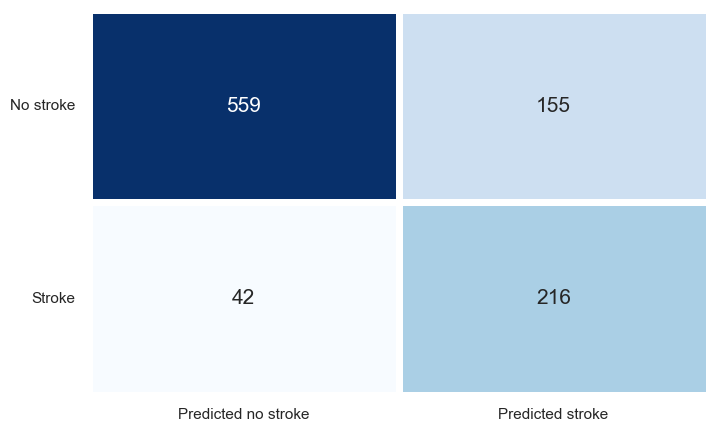

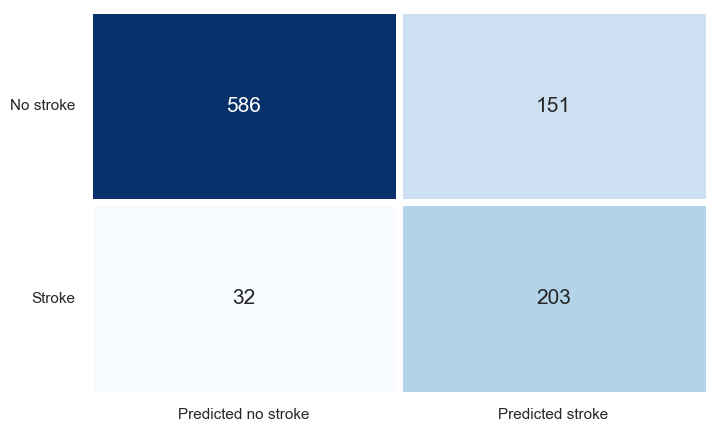

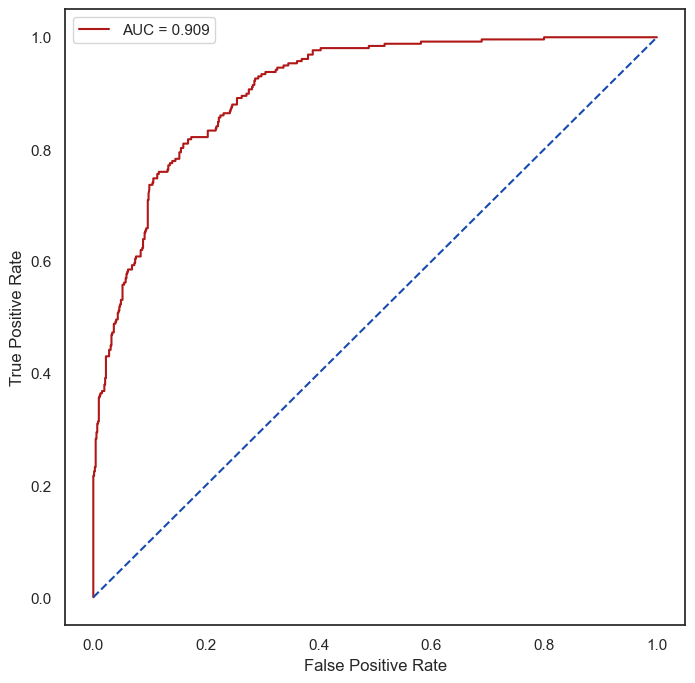

In [245]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 500, random_state= 0,max_depth=5)
classifier.fit(x_train_res, y_train_res)
#y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))



y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
plt.figure(figsize = (8, 5))
sns.heatmap(cm2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [246]:
thresholds = [ 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred = np.where(y_prob >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    print()

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       714
           1       0.46      0.98      0.63       258

    accuracy                           0.69       972
   macro avg       0.72      0.78      0.68       972
weighted avg       0.85      0.69      0.71       972


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.97      0.68      0.80       714
           1       0.51      0.94      0.66       258

    accuracy                           0.75       972
   macro avg       0.74      0.81      0.73       972
weighted avg       0.85      0.75      0.76       972


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       714
           1       0.58      0.84      0.69       258

    accuracy                           0.80       972
   macro avg       0.76      0.81      0.77       972
weighted avg       0.84    

In [247]:
# Lấy các chỉ số của các trường hợp FP và FN
false_positives = x_val_debug[(y_val == 0) & (y_pred2 == 1)]
false_negatives = x_val_debug[(y_val == 1) & (y_pred2 == 0)]

# Xem thông tin của các trường hợp FP và FN
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)

False Positives:
       age  hypertension  heart_disease  ever_married  avg_glucose_level  bmi  \
5254   71             0              0             1                198   27   
148    57             0              0             0                107   28   
3939   72             1              1             1                217   26   
3335   79             1              0             1                 74   29   
3566   59             1              0             1                204   30   
...   ...           ...            ...           ...                ...  ...   
2967   80             1              0             1                 83   29   
495    62             0              0             1                 72   22   
3099   79             0              0             1                 97   31   
5759   58             0              0             1                196   37   
2984   70             1              0             1                154   28   

      smoking_status_

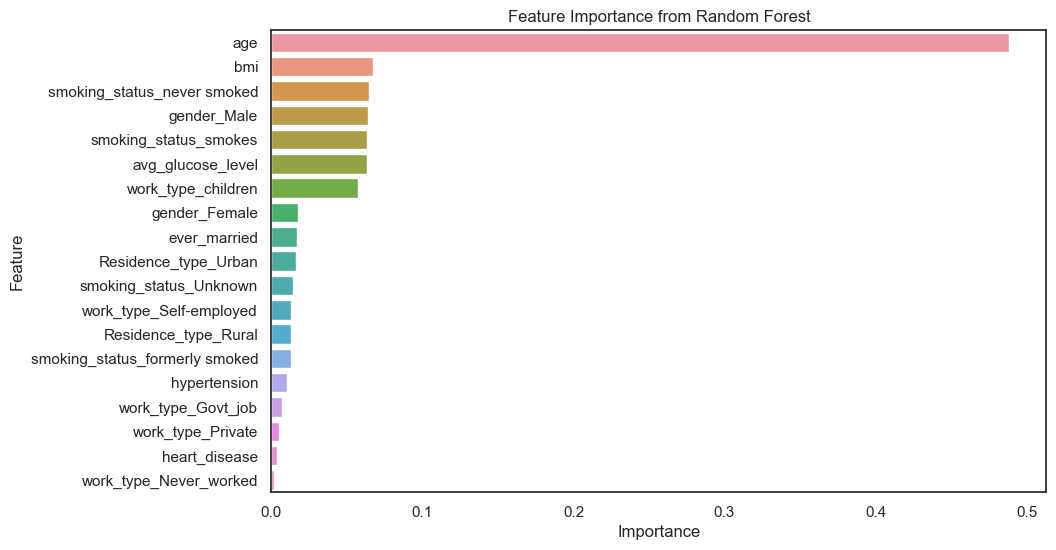

In [248]:
feature_importances = classifier.feature_importances_
features = x_train.columns

# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

## XGBoost <a id="11.2"></a>

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       714
           1       0.55      0.91      0.69       258

    accuracy                           0.78       972
   macro avg       0.75      0.82      0.76       972
weighted avg       0.85      0.78      0.79       972

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       737
           1       0.52      0.90      0.66       235

    accuracy                           0.77       972
   macro avg       0.74      0.82      0.74       972
weighted avg       0.85      0.77      0.79       972

ROC AUC score: 0.9055164701539531
Accuracy Score:  0.7788065843621399


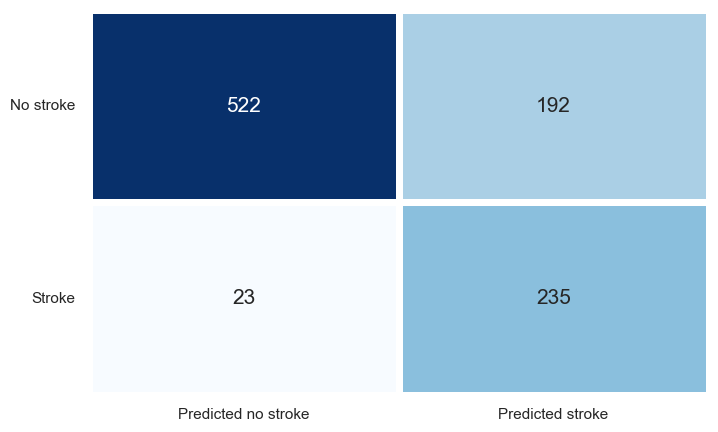

Text(0.5, 0, 'False Positive Rate')

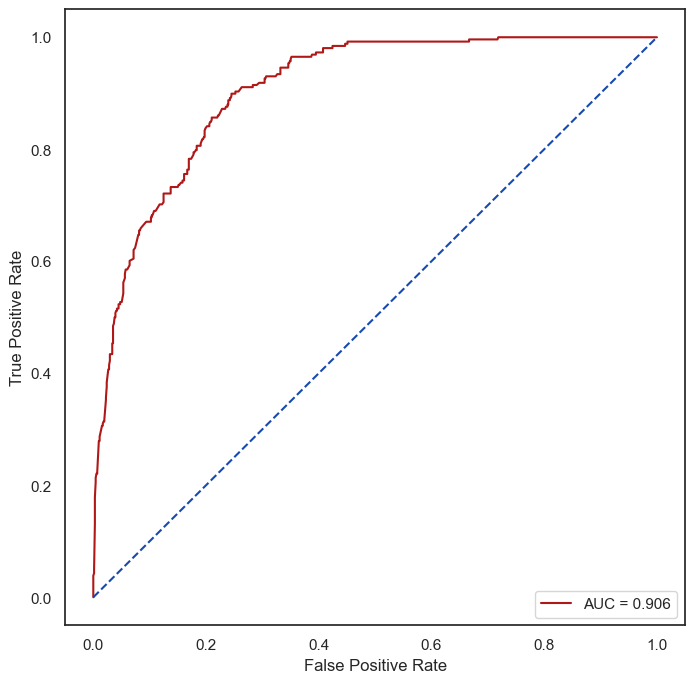

In [249]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1,max_depth=1)
classifier.fit(x_train_res, y_train_res)
# y_pred = classifier.predict(x_test)
# y_prob = classifier.predict_proba(x_test)[:,1]
# cm = confusion_matrix(y_test, y_pred)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [250]:
# Lấy các chỉ số của các trường hợp FP và FN
false_positives = x_val_debug[(y_val == 0) & (y_pred2 == 1)]
false_negatives = x_val_debug[(y_val == 1) & (y_pred2 == 0)]

# Xem thông tin của các trường hợp FP và FN
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)

False Positives:
       age  hypertension  heart_disease  ever_married  avg_glucose_level  bmi  \
5254   71             0              0             1                198   27   
148    57             0              0             0                107   28   
3939   72             1              1             1                217   26   
3566   59             1              0             1                204   30   
598    55             0              0             1                111   39   
...   ...           ...            ...           ...                ...  ...   
495    62             0              0             1                 72   22   
3099   79             0              0             1                 97   31   
291    64             0              0             0                 81   36   
5759   58             0              0             1                196   37   
2984   70             1              0             1                154   28   

      smoking_status_

In [251]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred = np.where(y_prob >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    print()

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.99      0.47      0.63       714
           1       0.40      0.99      0.57       258

    accuracy                           0.61       972
   macro avg       0.70      0.73      0.60       972
weighted avg       0.84      0.61      0.62       972


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.52      0.68       714
           1       0.43      0.99      0.60       258

    accuracy                           0.64       972
   macro avg       0.71      0.75      0.64       972
weighted avg       0.84      0.64      0.66       972


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       714
           1       0.46      0.98      0.63       258

    accuracy                           0.69       972
   macro avg       0.72      0.78      0.68       972
weighted avg       0.85    

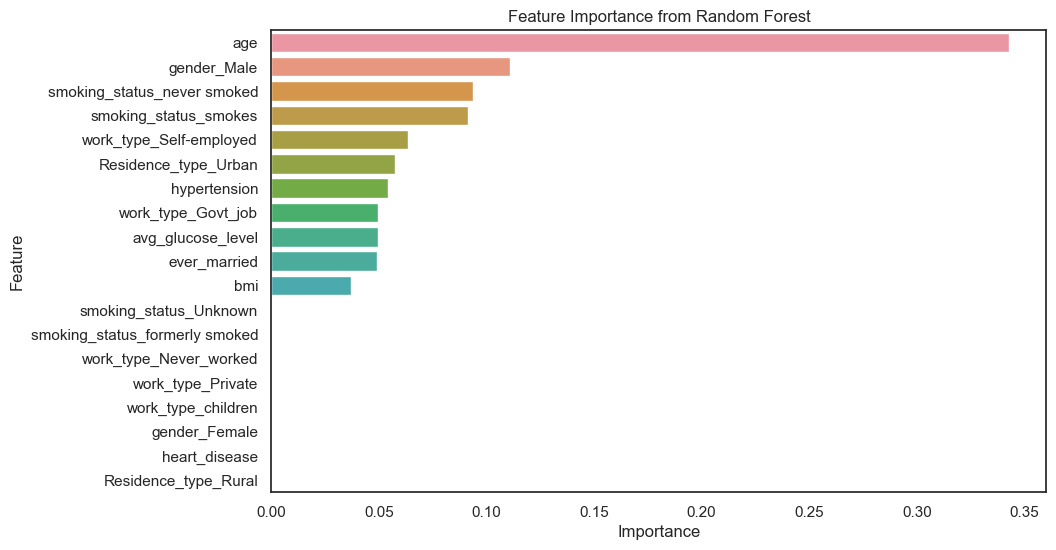

In [252]:
feature_importances = classifier.feature_importances_
features = x_train.columns

# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [253]:
error_df = x_test.copy()
error_df['true_label'] = y_test
error_df['predicted_label'] = y_pred
error_df['error'] = error_df['true_label'] != error_df['predicted_label']

sns.pairplot(error_df, hue='error', palette={False: "blue", True: "red"})
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
x_test = pd.DataFrame(x_test, columns=['age', 'bmi', '...'])  # Thêm tên các cột tương ứng

# Chuyển y_test và y_pred thành Series của pandas
y_test = pd.Series(y_test, name='true_label')
y_pred = pd.Series(y_pred, name='predicted_label')

# Thêm cột lỗi vào DataFrame
x_test['true_label'] = y_test.values
x_test['predicted_label'] = y_pred.values
x_test['error'] = x_test['true_label'] != x_test['predicted_label']

# Vẽ biểu đồ phân phối đặc điểm 'bmi'
sns.histplot(data=x_test, x='bmi', hue='error', multiple='dodge')
plt.title("Distribution of 'bmi' for Correct and Incorrect Predictions")
plt.show()

ValueError: Shape of passed values is (1022, 21), indices imply (1022, 3)